<p style="font-family: Arial; font-size:3em;color:black;"> Lab Exercise 8</p>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [10]:
# Import the built-in iris dataset to work with
iris = datasets.load_iris() # the dataset consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length
print("iris dataset",iris.data[:10,:])
X = iris.data[:, :2] # We only want to use the first two features (Sepal Length, Sepal Width)
y = iris.target # corresponding to 'setosa', 'versicolor', 'virginica
print("iris target",y[:10,])

iris dataset [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
iris target [0 0 0 0 0 0 0 0 0 0]


In [11]:
# Develop a linear Support Vector Machine to classify the irises
# Use GridSearchCV to optimize the model's hyperparameters (C, gamma, kernel)
# Compare the accuracies of the above two models

Linear SVM Accuracy: 0.8200

Grid Search Results:
Best parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.8200
Best model accuracy on full dataset: 0.8200


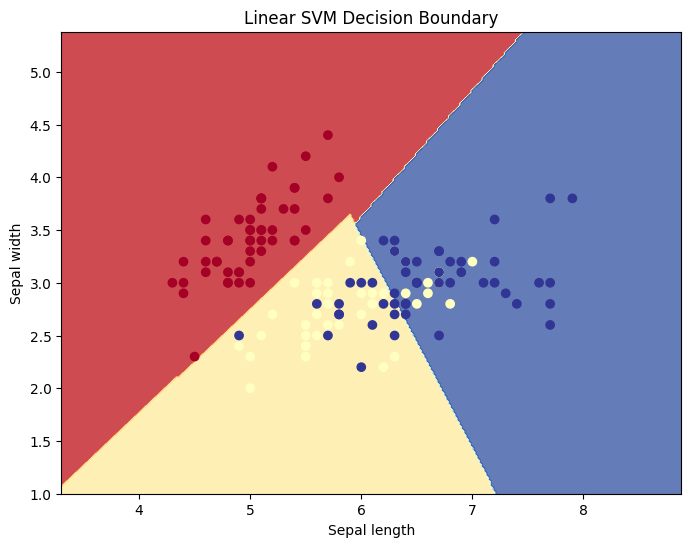

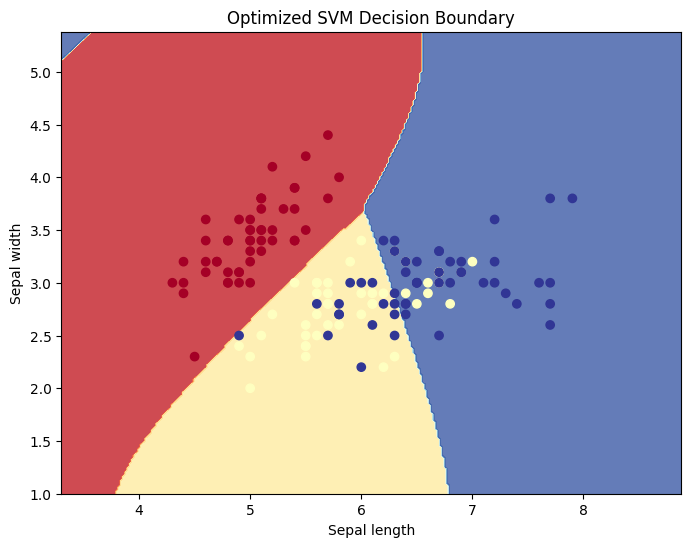

In [12]:
# Create a basic linear SVM
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(X, y)
linear_accuracy = linear_svm.score(X, y)
print(f"Linear SVM Accuracy: {linear_accuracy:.4f}")

# Using GridSearchCV to optimize hyperparameters
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create SVM classifier
svm_classifier = svm.SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X, y)

# Print results
print("\nGrid Search Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
print(f"Best model accuracy on full dataset: {grid_search.score(X, y):.4f}")

# Visualize the decision boundaries
def plot_decision_boundary(model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.show()

# Plot decision boundaries for both models
plot_decision_boundary(linear_svm, 'Linear SVM Decision Boundary')
plot_decision_boundary(grid_search.best_estimator_, 'Optimized SVM Decision Boundary')

# Analysis of Results:

Accuracy Analysis:

Both the Linear SVM and the Grid Search optimized model achieved the same accuracy of 82.00%

The Grid Search found that the best parameters were:
- C = 0.1
- gamma = 'auto'
- kernel = 'rbf'

Key Observations:
- Despite trying different hyperparameters through Grid Search, there was no improvement in accuracy over the basic Linear SVM
- This suggests that for this particular iris dataset using only the first two features (Sepal Length and Sepal Width), the linear boundary might be as effective as the more complex RBF kernel boundary
- The consistency of the accuracy across different evaluation methods (direct accuracy and cross-validation) indicates the model's stability in performance